# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
api_key = "5982138c45190b549382b2e32b7e6ac5"
url = 'http://api.openweathermap.org/data/2.5/weather?'

dfw = pd.DataFrame(columns = ['Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed'])
wdict = []
for indx, city in enumerate(cities):
    try:
        # Build query URL
        query_url = url + "appid=" + api_key + "&q=" + city
        #print('URL:', query_url)
        r = requests.get(query_url)

        d = r.json()
        name = d['name']
        clouds = d['clouds']['all']
        country = d['sys']['country']
        date = d['dt']
        city_id = d['id']
        humidity = d['main']['humidity']
        max_temp = d['main']['temp_max']
        lng = d['coord']['lon']
        lat = d['coord']['lat']
        wind = d['wind']['speed']
        print(name)
        #print(lat)
        wdict.append({'City':city,'Cloudiness':clouds, 'Country':country, 'Date':date, 
        'Humidity':humidity, 'Lat':lat, 'Lon':lng, 'Max Temp':max_temp, 'Wind Speed':wind})
    except:
        print("City not found")
#df2 = pd.DataFrame(wdict)
#dfw.append(df2)


df2

Ostrovnoy
Juba
Mamakan
Bredasdorp
Tuktoyaktuk
Lompoc
Ushuaia
Punta Arenas
Arraial do Cabo
City not found
Dehloran
Mataura
Nikolskoye
Albany
Corn Island
Busselton
City not found
City not found
Port Elizabeth
Bagting
Atuona
Butaritari
Ciudad Lazaro Cardenas
Rawson
Ilulissat
Port Lincoln
Romans-sur-Isere
City not found
Sitka
City not found
Mar del Plata
Hilo
Iranshahr
Vila
Barrow
Cabo San Lucas
Cape Town
Shimoda
Oussouye
Airai
Hermanus
Payo
Tasiilaq
Lata
Portland
Qaqortoq
Avarua
Darhan
Port Macquarie
City not found
Narsaq
Bengkulu
Prado
Rikitea
Souillac
City not found
Maltahohe
Dikson
Natitingou
Kieta
Te Anau
Kapaa
Saint-Philippe
Samarai
Loa Janan
Clyde River
New Norfolk
Manta
Wattegama
Viedma
Neuquen
Klaksvik
Port Hardy
City not found
Ribeira Grande
Kodiak
Vestmanna
City not found
Upernavik
Manubul
City not found
Luderitz
Bluff
Saskylakh
Kumul
Onega
Carnarvon
Winslow
Roebourne
Arroio Grande
Ojinaga
Vila Velha
Kruisfontein
Hamilton
Isla Mujeres
City not found
Oda
Vaini
Yellowknife
Chyhyry

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,ostrovnoy,83,RU,1580503925,100,68.05,39.51,252.87,4.03
1,juba,100,SS,1580503586,24,4.85,31.58,302.64,0.94
2,mamakan,100,RU,1580503586,98,57.82,114.00,247.79,0.74


In [28]:
df2 = pd.DataFrame(wdict)
df2

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,ostrovnoy,83,RU,1580503925,100,68.05,39.51,252.87,4.03
1,juba,100,SS,1580504039,24,4.85,31.58,302.64,0.94
2,mamakan,100,RU,1580504248,98,57.82,114.00,247.79,0.74
3,bredasdorp,100,ZA,1580504248,82,-34.53,20.04,293.15,1.00
4,tuktoyaktuk,40,CA,1580504248,66,69.45,-133.04,238.15,5.10
...,...,...,...,...,...,...,...,...,...
543,anchorage,75,US,1580504345,84,61.22,-149.90,263.15,1.96
544,durban,56,ZA,1580504345,88,-29.86,31.03,297.15,1.50
545,vilcun,20,CL,1580504345,61,-38.65,-72.23,299.26,6.20
546,pakxe,0,LA,1580504345,79,15.12,105.78,290.29,0.78


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
df2.to_csv(output_data_file)

In [30]:
df2.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lon           548
Max Temp      548
Wind Speed    548
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

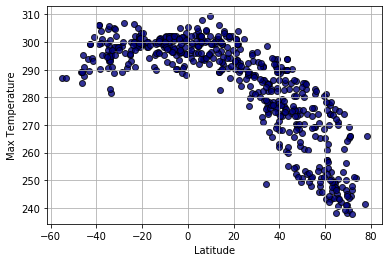

In [34]:
plt.scatter(df2["Lat"], df2["Max Temp"],marker = 'o',color='navy', edgecolor="black", alpha = 0.8)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
plt.show()

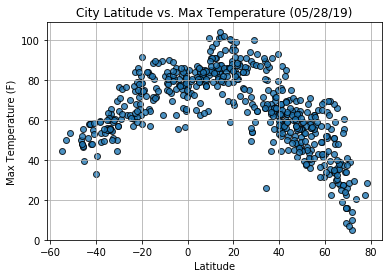

#### Latitude vs. Humidity Plot

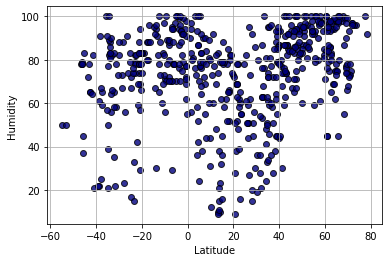

In [35]:
plt.scatter(df2["Lat"], df2["Humidity"],marker = 'o',color='navy', edgecolor="black", alpha = 0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

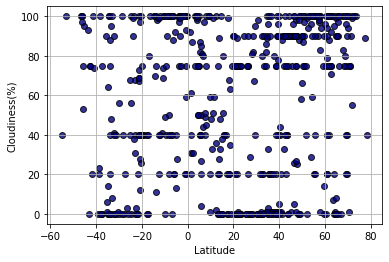

In [36]:
plt.scatter(df2["Lat"], df2["Cloudiness"],marker = 'o',color='navy', edgecolor="black", alpha = 0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

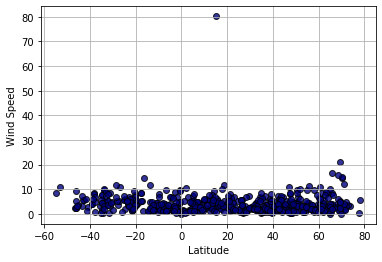

In [38]:
plt.scatter(df2["Lat"], df2["Wind Speed"],marker = 'o',color='navy', edgecolor="black", alpha = 0.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()

## Linear Regression

In [41]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg(x_values, y_values, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.show()

In [42]:
# Create Northern and Southern Hemisphere DataFrames
north_df2 = df2.loc[(df2["Lat"]>=0)]
south_df2 = df2.loc[(df2["Lat"]<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

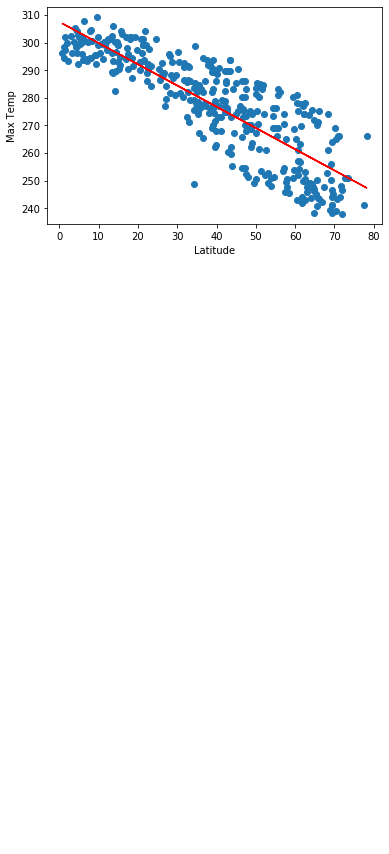

In [43]:
x_values = north_df2["Lat"]
y_values = north_df2["Max Temp"]
linear_reg(x_values, y_values, "Max Temp")

The r-squared is: -0.8151657406810827


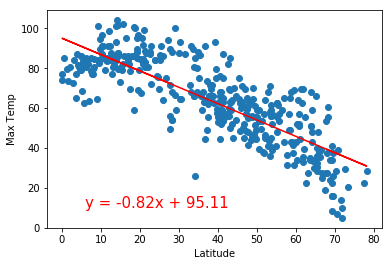

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


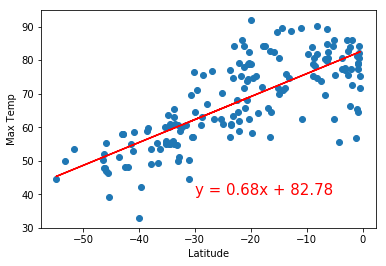

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


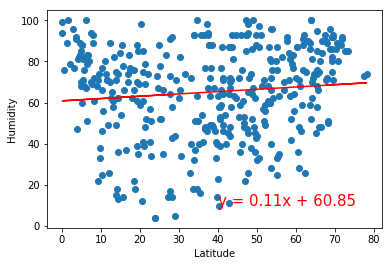

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


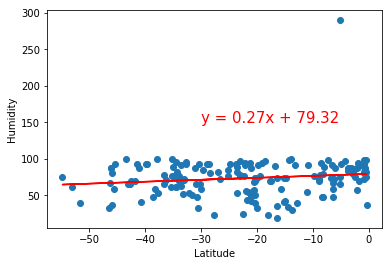

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


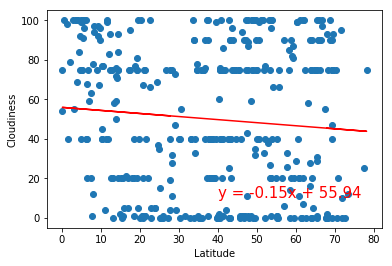

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


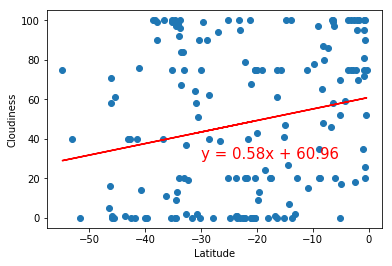

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


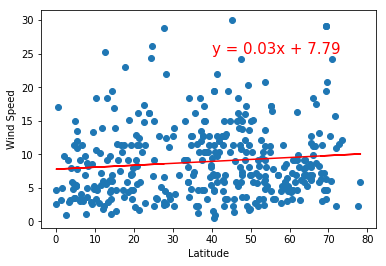

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


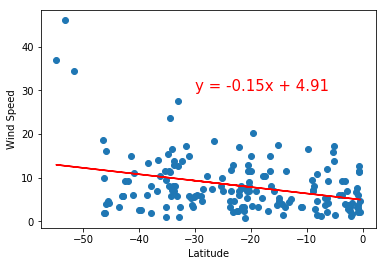